# Hypotesetest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for. 

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt. 

Mere presist vil jeg gjøre utsagnet at på en tilfeldig kalenderdag
er temperaturen mere enn en grad høyere
enn den var på den samme kalenderdagen i året 40 år tidligere.

Jeg vil bruke de daglige temperaturmålingene i de siste 3653
dagene (de siste ti årene) og de 3653 dagene som var 40 år tidligere
for å teste denne hypotesen.

For $i = 1, \dots, 3653$ la $y_i$ være temperaturen for for $10$ år minus $i$ dager siden
minus temperaturen for $i$ dager og $40$ år siden. 

Mitt gjett er at
tallene $y_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu$ og at
$\mu > \mu_0$ for $\mu_0 = 1 \ C^{\circ}$.

Jeg forventer at gjennomsnittet $E(y)$ av tallene $y_i$ er nær $\mu$, men jeg vil gjerne vite hvor stort det skal være for at jeg kan være rimelig sikker på at $\mu > \mu_0 = 1 \ C^{\circ}$.

**Antatt gjennomsnittsverdi** $\mu_0 = 1 \ C^{\circ}$

**Nullhypotese ($H_0)$:** $\mu = \mu_0$.

**Alternativ hypotese ($H_a$):** $\mu > \mu_0$.

*Det er konvensjon at nullhypotesen er $\mu = \mu_0$.* Egentlig er det enklere å bruke $\mu \leq \mu_0$ som nullhypotese, men det er ikke vanlig.

## Eksempler på sannsynlighetsfordelinger:

Et sannsynlighetsmål forteller hvor sannsynlig noe er. For eksempel hvor sannsynlig det er å slå to seksere på rad med en terning, 
eller hvor sannsynlig det er at en tilfeldig person i dette rommet er høyere en 190 cm.

Hvis sannsynlighetsmålet forteller om sannsynligheten av tallverdier, så har det et gjennomsnitt $\mu$ og et standardavvik $\sigma$.

### Sannsynlighetsfordeling for terningkast.

Når vi sier at et utvalg av tall er "trukket" fra en sannsynlighetsfordeling betyr det at tall der sannsynlighetsfordelingen er høy tenderer til å bli trukket oftere enn tall der sannsynlighetsfordelinen er lav.

La oss si at vi har en svart og en hvit terning, og at vi gjør et eksperiment der kaster begge terningene samtidig. 

**Oppgave** Hva er sannsynligheten for at vi slår to seksere? Og for at vi slår en femmer og en sekser?

Sannsynlighetsfordelingen er illustrert i figuren under:

<img src="Dice_Distribution_(bar).svg" alt="image" width="600" height="auto">

(Tim Stellmach, Public domain, via Wikimedia Commons)

**Oppgave**

Hva er gjennomsnittet $\mu$ for sannsynlighetsfordelingen for summen av øynene ved kast av to terninger?

## Normalfordeling

Normalfordelingen kan beskrives ved sin forventningsverdi μ og sitt standardavvik σ.

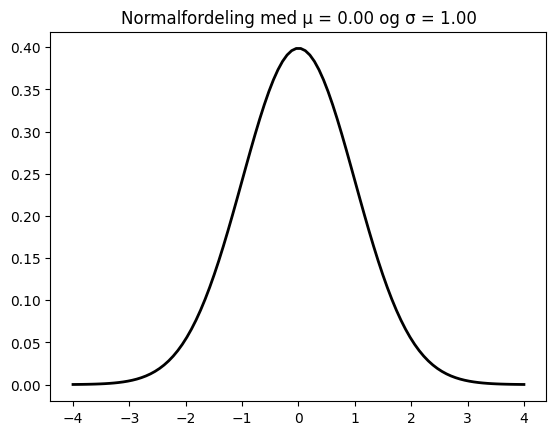

In [2]:
# Plotter normalfordeling gjennomsnitt 0 og standardavvik 1
xmin = -4
xmax = 4
mu, std = 0, 1
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Når vi trekker ett tall fra normalfordelingen over er det mest sannsynlig å trekke ett tall nær $0$, og det er veldig lite sannsynlig å trekke ett tall som er stort. For eksempel større enn $4$.

Sannsynligheten for å trekke et tall som er større enn 2 er gitt ved arealet til det røde området på figuren under.

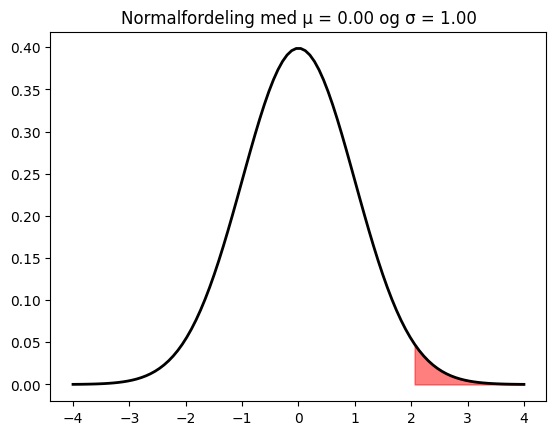

In [3]:
# Plotter normalfordeling gjennomsnitt 0 og standardavvik 1
xmin = -4
xmax = 4
t_crit = 2
mu, std = 0, 1
x = np.linspace(xmin, xmax, 100)
y = scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std)
plt.plot(x, y, 'k', linewidth=2)
plt.fill_between(x, y, where=(x > t_crit), color='red', alpha=0.5, label=r'P(H0)=P(μ≤μ0)')
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Dette arealet kan vi regne ut ved å integrere. I pakken scipy.stats kan vi enkelt be om å få verdien til integralet $\int_{-\infty}^2 p(x) dx$ for en sannsynlighetsfordelingsfunksjon $p(x)$. For normalfordelingen finnes den ved å skrive `scipy.stats.norm.cdf(2)`. Arealet til det røde området er $1 - \int_{-\infty}^2 p(x) dx$.

In [4]:
1 - scipy.stats.norm.cdf(2)

np.float64(0.02275013194817921)

Dette kan tolkes slik: Hvis forskjellen mellom temperatur i dag og på samme dagen på året for 40 år siden hadde vært normalfordelt med gjennomsnitt $0$ og standardsvvik $1$ så er sannsynligheten for at det i dag er mere enn to grader varmere enn det var for 40 år siden $2.3 \%$.

[t-test for temperaturdata](paretetemperaturer.ipynb)